## Objectives
After completing this lab you will be able to:

->Train decision tree models with customized hyperparameters


->Evaluate decision tree models on classification tasks

->Visualize decision tree models by plotting the tree

->Tune the hyperparameters to find the optimized one for a specific task

In [45]:
!pip install --upgrade scikit-learn

In [46]:
import pandas as pd
import numpy as np
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn import metrics
# Evaluation metrics related methods
from sklearn.metrics import classification_report, accuracy_score, f1_score, confusion_matrix, precision_recall_fscore_support, precision_score, recall_score

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [47]:
rs = 123

## Load and explore the tumor dataset

In [48]:
tumor_df = pd.read_csv('/content/tumor.csv')

In [49]:
tumor_df.head()

,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
0,5,1,1,1,2,1,3,1,1,0
1,5,4,4,5,7,10,3,2,1,0
2,3,1,1,1,2,2,3,1,1,0
3,6,8,8,1,3,4,3,7,1,0
4,4,1,1,3,2,1,3,1,1,0


In [50]:
# Get the input features
X = tumor_df.iloc[:, :-1]
# Get the target variable
y = tumor_df.iloc[:, -1:]

In [51]:
# Split the training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state = rs)

## Train a default decision tree

Training a decision classifier is very straightforward with sklearn, we first need to define a DecisionTreeClassifier object. In the first step, we will use all the default arguments.

In [52]:
# Train a decision tree with all default arguments
model = DecisionTreeClassifier(random_state=rs)

In [53]:
model.fit(X_train, y_train.values.ravel())

DecisionTreeClassifier(random_state=123)

In [54]:
preds = model.predict(X_test)

In [55]:
def evaluate_metrics(yt, yp):
    results_pos = {}
    results_pos['accuracy'] = accuracy_score(yt, yp)
    precision, recall, f_beta, _ = precision_recall_fscore_support(yt, yp, average='binary')
    results_pos['recall'] = recall
    results_pos['precision'] = precision
    results_pos['f1score'] = f_beta
    return results_pos

In [56]:
evaluate_metrics(y_test, preds)

{'accuracy': 0.9562043795620438,
 'recall': 0.9583333333333334,
 'precision': 0.92,
 'f1score': 0.9387755102040817}

## Visualize the trained decision tree

We will be using the tree.plot_tree() method provided by sklearn to quickly plot any decision tree model.

In [57]:
def plot_decision_tree(model, feature_names):
    plt.subplots(figsize=(25, 20))
    tree.plot_tree(model,
                       feature_names=feature_names,
                       filled=True)
    plt.show()

In [58]:
feature_names = X.columns.values

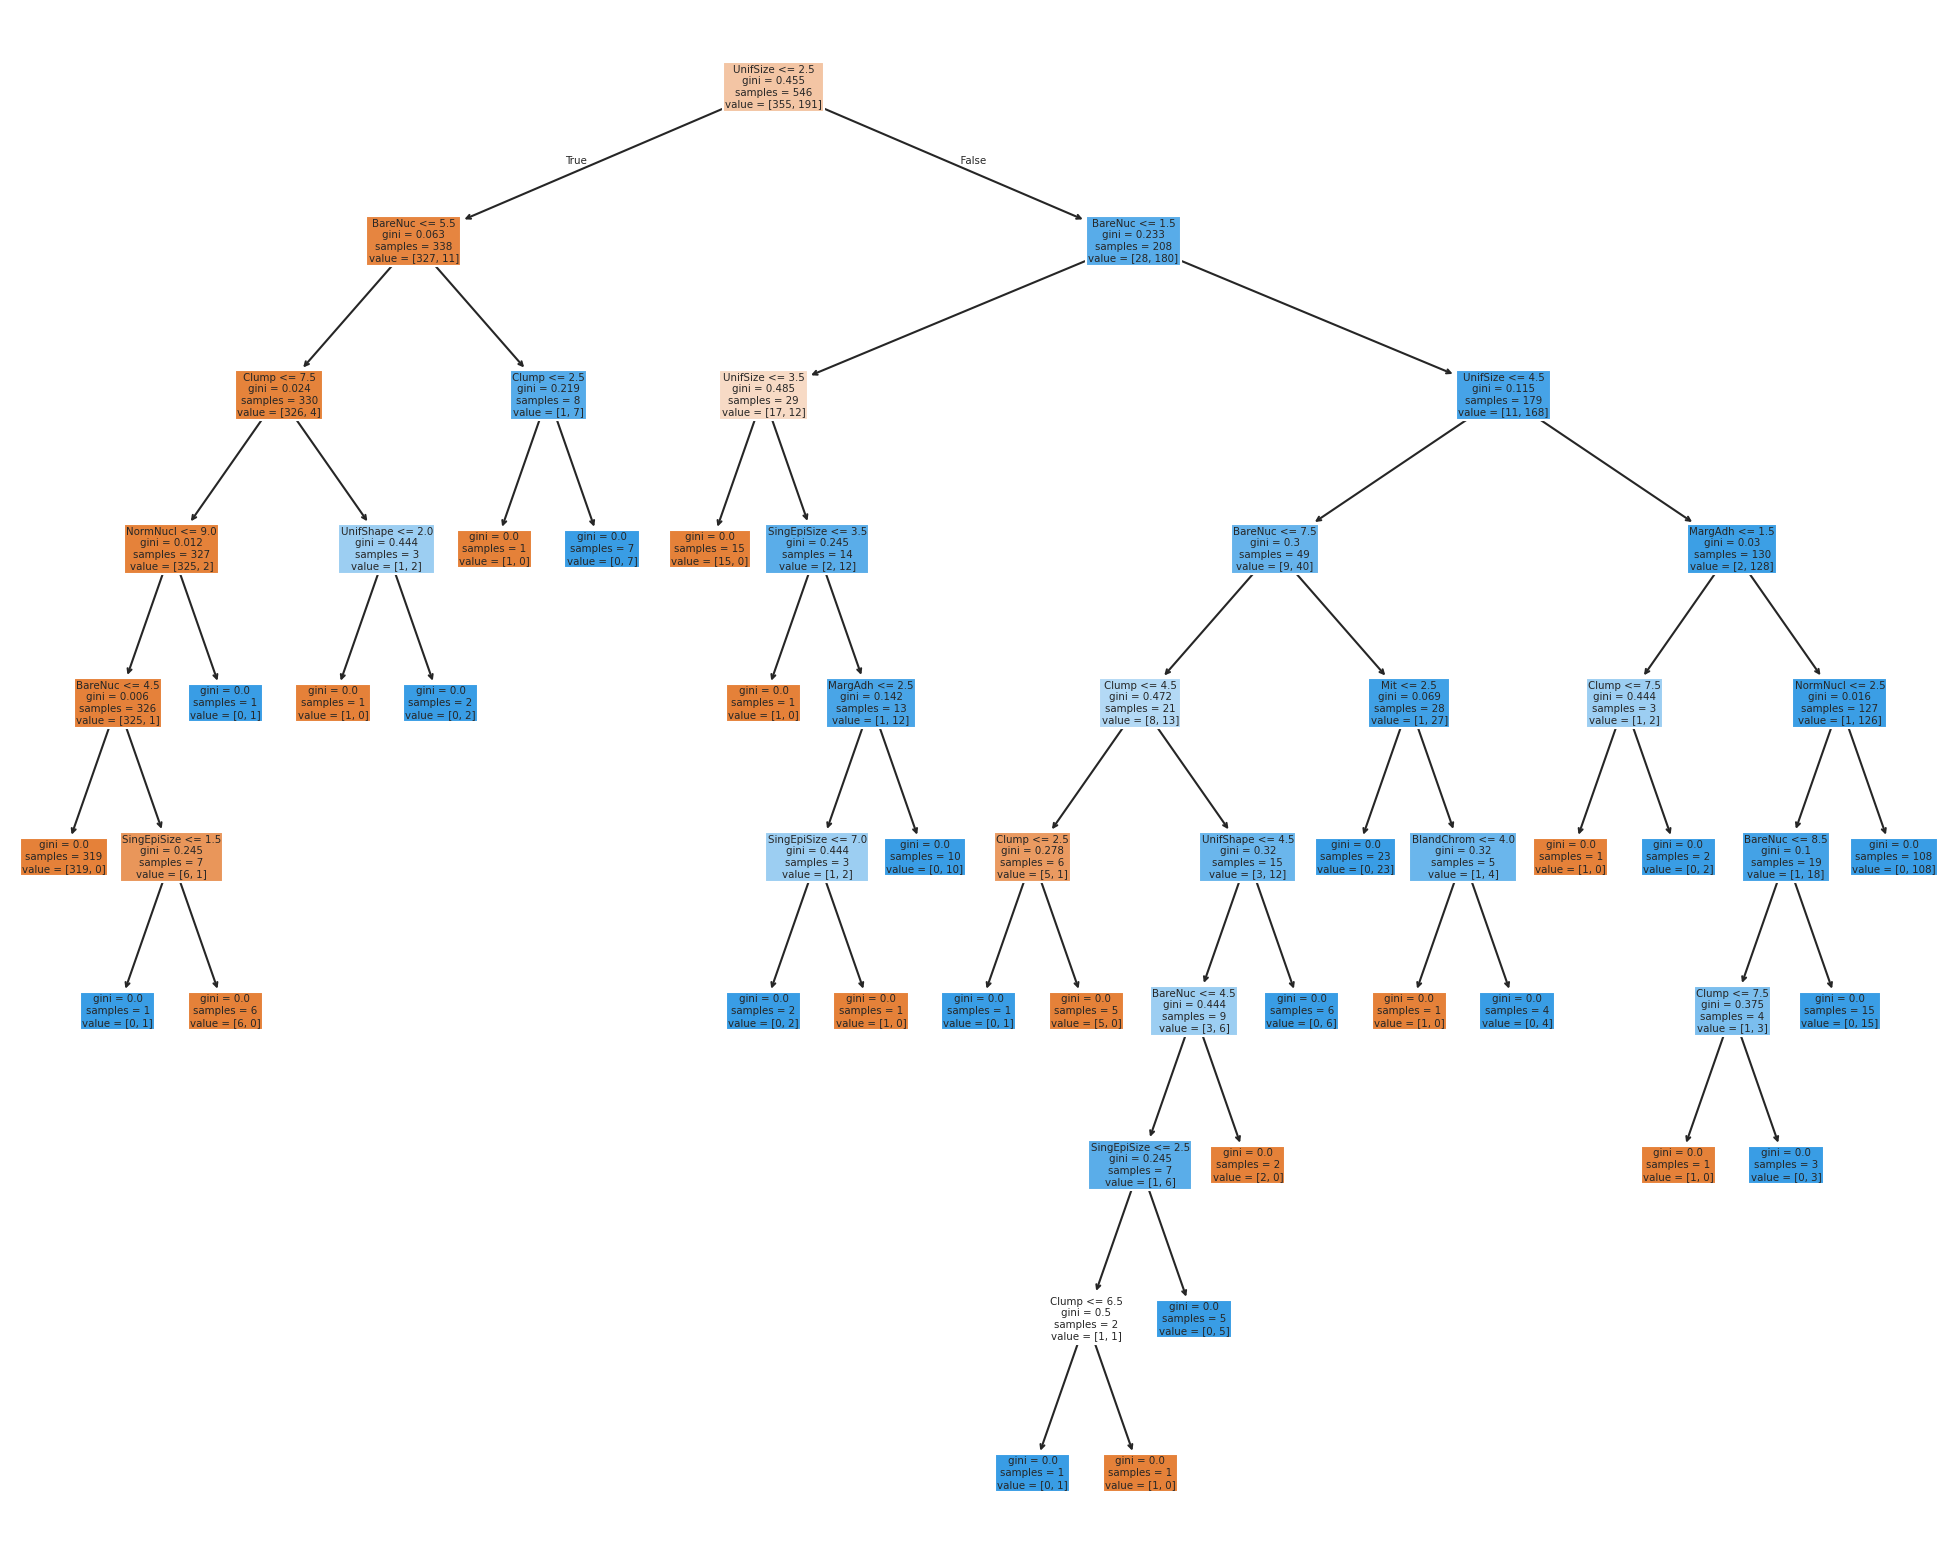

In [59]:
plot_decision_tree(model, feature_names)

And you should see a relatively complex decision tree model being plotted. First, you may notice the decision tree is color-labeled, orange node means a majority of samples in the node belong to Class 0 and blue node means a majority of samples in the node belong to Class 1, and white node means it has an equal amount of Class 0 and Class 1 samples.









Because the tree is very big, so the rules and split threshold on each node are very difficult to see. In addition, big decision trees may easily bring large variance and cause overfitting. Next, let's try to build simplified decision trees, and hopefully the simplified decision trees may generate even better results.

## Cutomize the decision tree model
The DecisionTreeClassifier has many arguments (model hyperparameters) that can be customized and eventually tune the generated decision tree classifiers. Among these arguments, there are three commonly tuned arguments as follows:

criterion: gini or entropy, which specifies which criteria to be used when splitting a tree node





max_depth: a numeric value to specify the max depth of the tree. Larger tree depth normally means larger model complexity




min_samples_leaf: The minimal number of samples in leaf nodes. Larger samples in leaf nodes will tend to generate simpler trees
Let's first try the following hyperparameter values:

criterion = 'entropy'
max_depth = 10
min_samples_leaf=3

In [60]:
# criterion = 'entropy'
# max_depth = 10
# min_samples_leaf=3
custom_model = DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_leaf=3, random_state=rs)

In [61]:
custom_model.fit(X_train, y_train.values.ravel())
preds = custom_model.predict(X_test)
evaluate_metrics(y_test, preds)

{'accuracy': 0.9635036496350365,
 'recall': 0.9166666666666666,
 'precision': 0.9777777777777777,
 'f1score': 0.946236559139785}

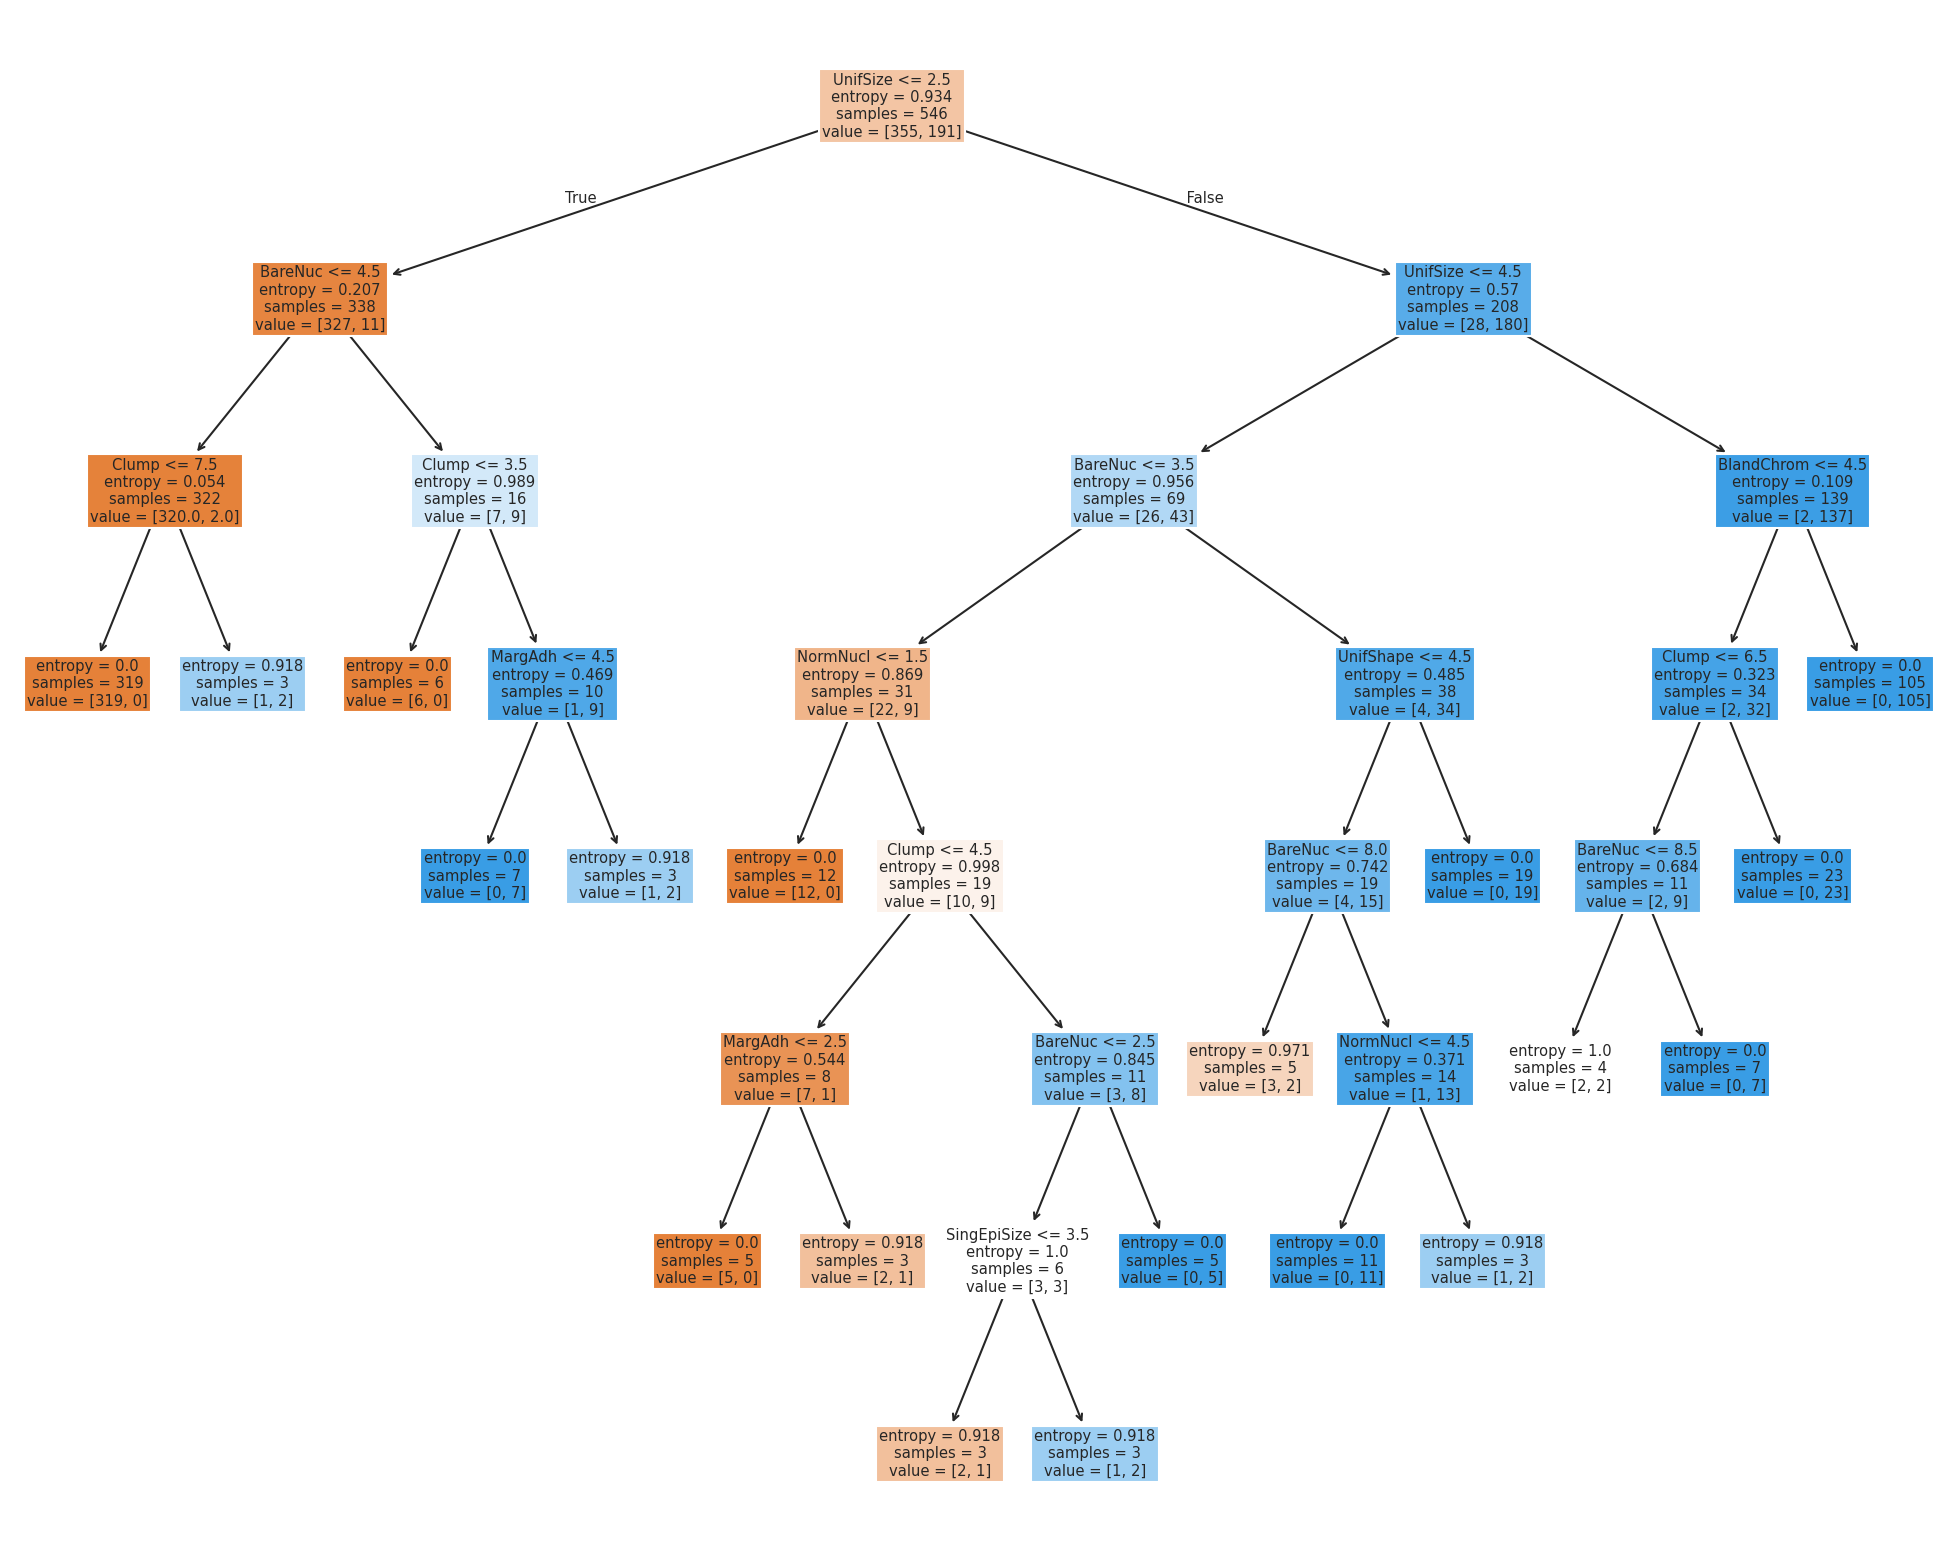

In [62]:
# Plot the decision tree
plot_decision_tree(custom_model, feature_names)

## Coding exercise: build and visualize a decision tree with criterion='gini', max_depth = 15, and min_samples_leaf=5

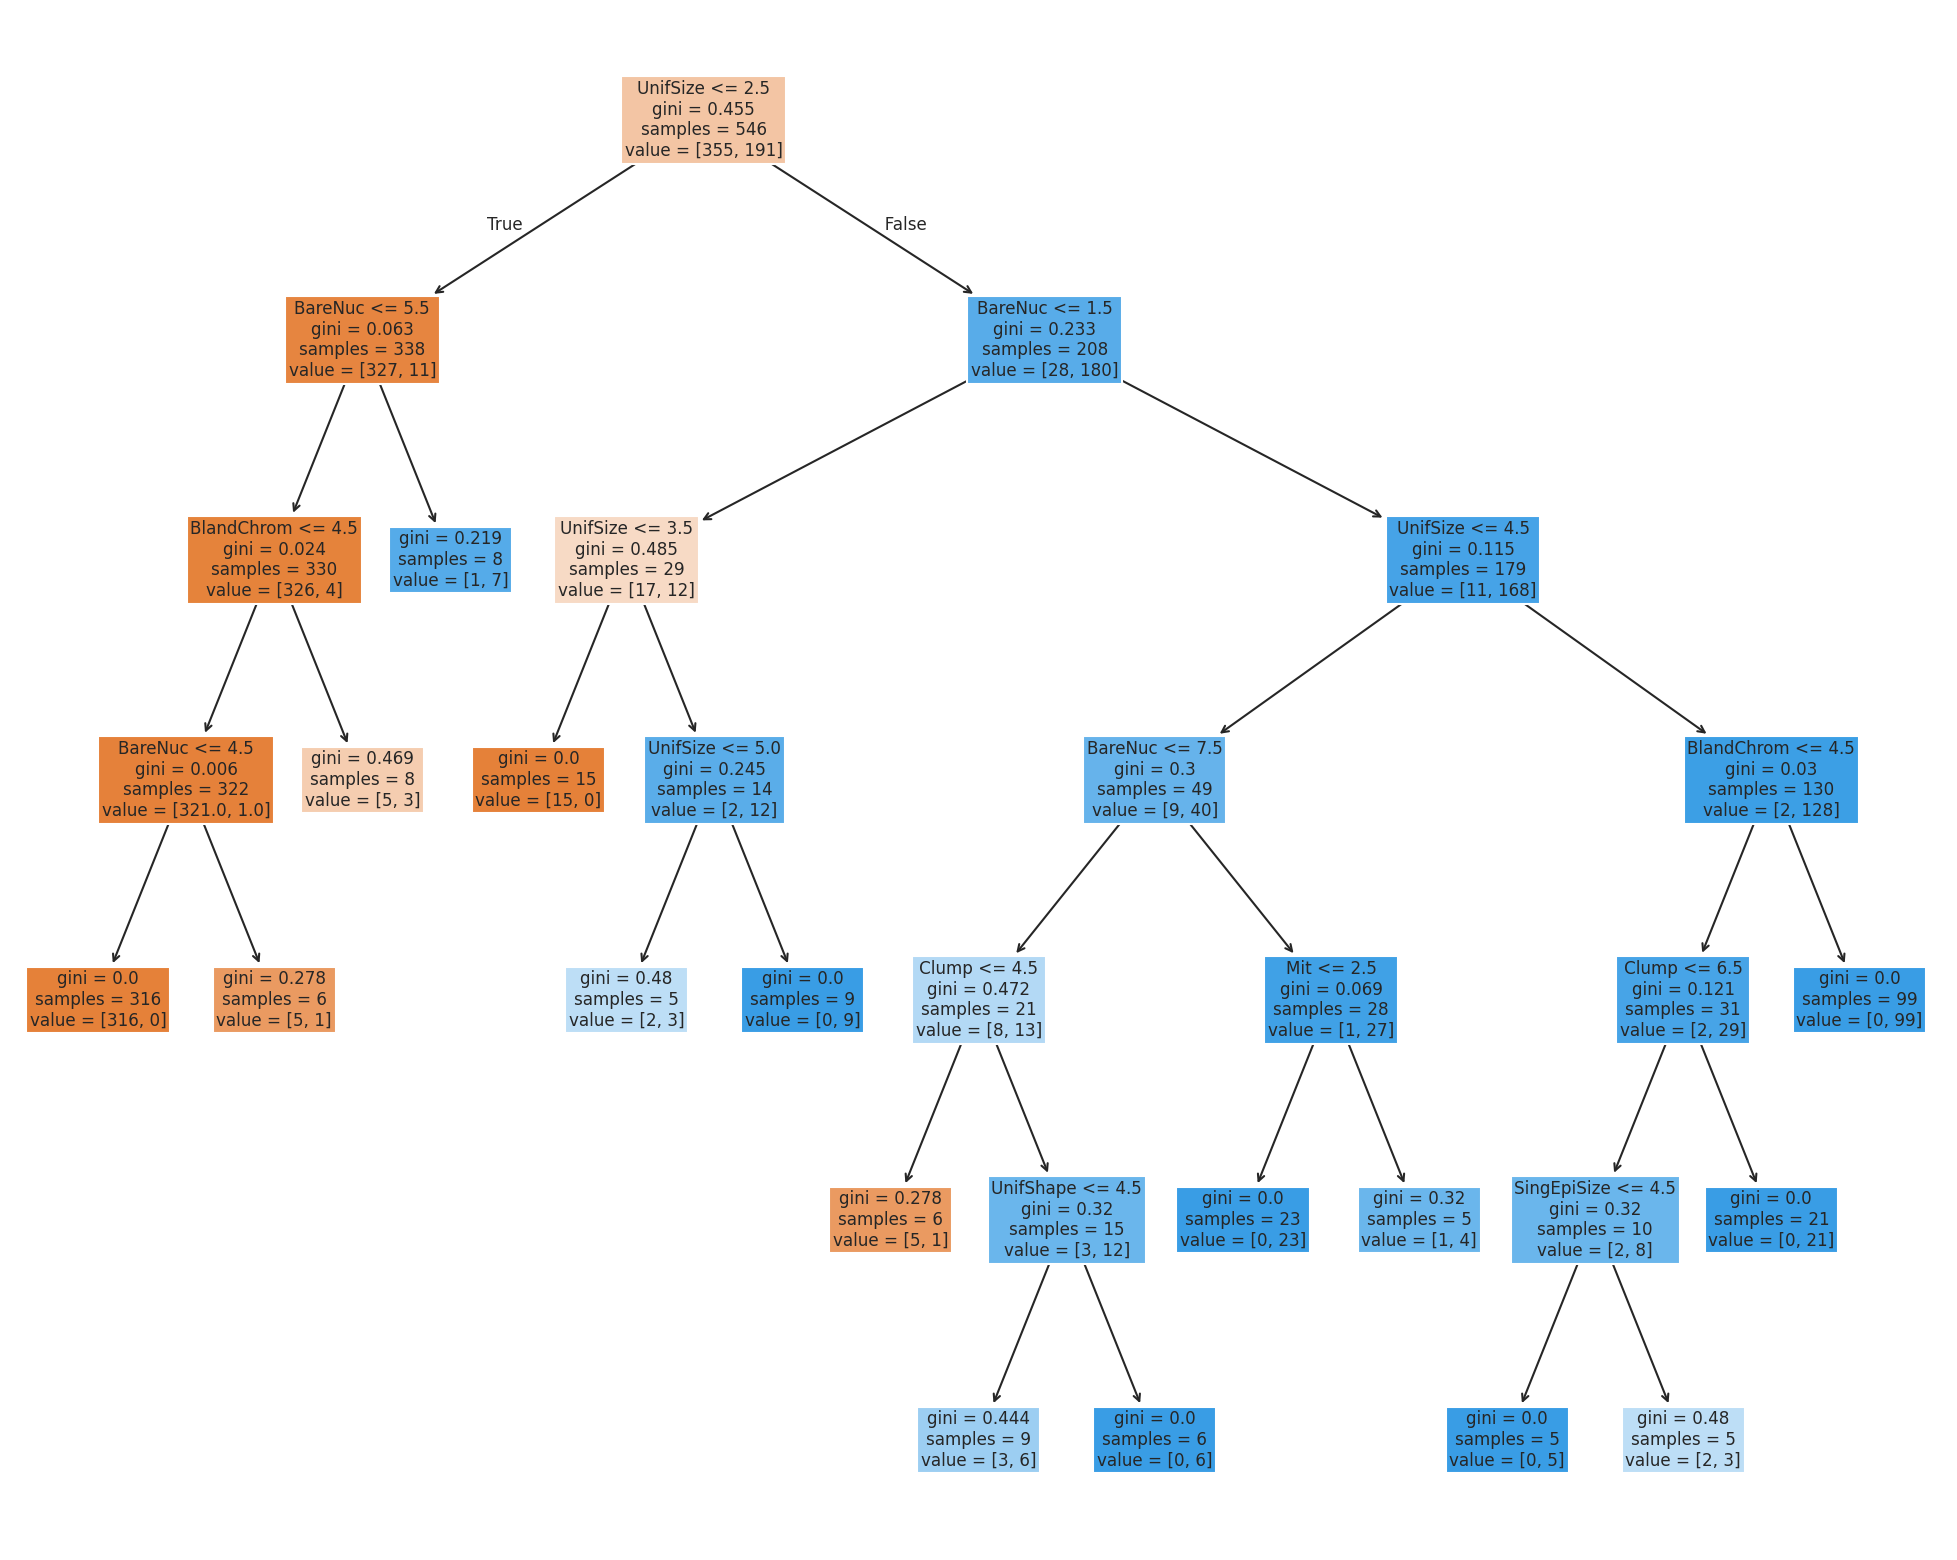

In [63]:
custom_model = DecisionTreeClassifier(criterion='gini', max_depth=15, min_samples_leaf=5, random_state=rs)
custom_model.fit(X_train, y_train.values.ravel())
preds = custom_model.predict(X_test)
evaluate_metrics(y_test, preds)
# Plot the decision tree
plot_decision_tree(custom_model, feature_names)

## Tune hyperparameters
Lastly, let's try to find the optimized hyperparameters, which can produce the highest F1 score, via GridSearch cross-validation.

We define a params_grid dict object to contain the parameter candidates:

In [64]:
params_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [5, 10, 15, 20],
    'min_samples_leaf': [1, 2, 5]
}

In [65]:
model = DecisionTreeClassifier(random_state=rs)

In [66]:
grid_search = GridSearchCV(estimator = model,
                        param_grid = params_grid,
                        scoring='f1',
                        cv = 5, verbose = 1)
grid_search.fit(X_train, y_train.values.ravel())
best_params = grid_search.best_params_

Fitting 5 folds for each of 24 candidates, totalling 120 fits


In [67]:
best_params

{'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 5}

## Coding exercise: build and visualize a decision tree with the best parameters

In [68]:
custom_model = DecisionTreeClassifier(criterion='gini', max_depth=10, min_samples_leaf=5, random_state=rs)
custom_model.fit(X_train, y_train.values.ravel())
preds = custom_model.predict(X_test)
evaluate_metrics(y_test, preds)
# Plot the decision tree

{'accuracy': 0.9708029197080292,
 'recall': 0.9791666666666666,
 'precision': 0.94,
 'f1score': 0.9591836734693877}